# Spaceship Titanic
**Predict which passengers are transported to an alternate dimension**

<img src ="https://www.fbcoverlover.com/covers/Two-Planets-in-space-fb-facebook-cover-timeline-profile-picture.jpg?i">

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!


**Source:** Kaggle


<h1 style="background-color:SeaGreen;text-align: center"> Table of Contents</h1>
<p style="background-color:MediumSeaGreen;text-align: center">
1.Import Libraries<br>
2.Checking DataSet<br>
3.Exploratory Data Analysis & Data Visualisation<br>
4.Preprocessing<br>
5.Model Analysis<br>
6.Test Prediction <br>

Created by: Deepika Kumar
</p>



<h1 style="background-color:yellow;text-align: center">1. Import Libraries</h1>

In [291]:
import matplotlib
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import klib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.subplots as sp



<h1 style="background-color:yellow;text-align: center">2. Checking DataSet</h1>

In [292]:
train=pd.read_csv("train.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [293]:
test=pd.read_csv("test.csv")
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [294]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [295]:
print("Shape of the dataframe",train.shape)
print("duplicated Value count",train.duplicated().sum())
analys = pd.DataFrame({
    'Unique':train.nunique(),
    'Null':train.isnull().sum(),
    
    'NullPercent':train.isna().sum() / len(train),
    'Type':train.dtypes.values
    
})
display(analys)

Shape of the dataframe (8693, 14)
duplicated Value count 0


,Unique,Null,NullPercent,Type
PassengerId,8693,0,0.000000,object
HomePlanet,3,201,0.023122,object
CryoSleep,2,217,0.024963,object
Cabin,6560,199,0.022892,object
Destination,3,182,0.020936,object
Age,80,179,0.020591,float64
VIP,2,203,0.023352,object
RoomService,1273,181,0.020821,float64
FoodCourt,1507,183,0.021051,float64
ShoppingMall,1115,208,0.023927,float64


In [296]:
print("Shape of the dataframe",test.shape)
print("duplicated Value count",test.duplicated().sum())
analys = pd.DataFrame({
    'Unique':test.nunique(),
    'Null':test.isnull().sum(),
    
    'NullPercent':test.isna().sum() / len(test),
    'Type':test.dtypes.values
    
})
display(analys)

Shape of the dataframe (4277, 13)
duplicated Value count 0


,Unique,Null,NullPercent,Type
PassengerId,4277,0,0.000000,object
HomePlanet,3,87,0.020341,object
CryoSleep,2,93,0.021744,object
Cabin,3265,100,0.023381,object
Destination,3,92,0.021510,object
Age,79,91,0.021277,float64
VIP,2,93,0.021744,object
RoomService,842,82,0.019172,float64
FoodCourt,902,106,0.024784,float64
ShoppingMall,715,98,0.022913,float64



<h2 style="background-color:DodgerBlue;text-align: center">NaN validation</h2>

In [297]:
train.replace('', np.NaN, inplace=True)



In [298]:
test.replace('', np.NaN, inplace=True)

In [299]:
for i in train.columns:
    print(i,":\n",train[i].value_counts())
    print("-"*20)
    

PassengerId :
 0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
--------------------
HomePlanet :
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
--------------------
CryoSleep :
 False    5439
True     3037
Name: CryoSleep, dtype: int64
--------------------
Cabin :
 G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
--------------------
Destination :
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
--------------------
Age :
 24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64
--------------------
VIP :
 False    82

### Homeplanet 

lets assign all blanks to Earth since the Vessel started there.

In [300]:
train["HomePlanet"].isnull().sum()

201

In [301]:
train["HomePlanet"]=train["HomePlanet"].fillna("Earth")

In [302]:
train["HomePlanet"].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [303]:
test["HomePlanet"]=test["HomePlanet"].fillna("Earth")

In [304]:
test["HomePlanet"].value_counts()

Earth     2350
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

### Destination

Let's assume final destination is TRAPPIST-1e and assign all nan value to final destination.

In [305]:
train["Destination"]=train["Destination"].fillna("TRAPPIST-1e")

In [306]:
train["Destination"].isnull().sum()

0

In [307]:
test["Destination"]=test["Destination"].fillna("TRAPPIST-1e")

In [308]:
test["Destination"].isnull().sum()

0

### CryoSleep

In [309]:
train["CryoSleep"]=train["CryoSleep"].fillna(False)

In [310]:
train["CryoSleep"].isnull().sum()

0

In [311]:
test["CryoSleep"]=test["CryoSleep"].fillna(False)

In [312]:
test["CryoSleep"].isnull().sum()

0

### Name

In [313]:
train["Name"]=train["Name"].fillna("Unkown Passenger")

In [314]:
train["Name"].isnull().sum()

0

In [315]:
test["Name"]=test["Name"].fillna("Unkown Passenger")

In [316]:
test["Name"].isnull().sum()

0

### VIP

In [317]:
train["VIP"]=train["VIP"].fillna(False)

In [318]:
train["VIP"].isnull().sum()

0

In [319]:
test["VIP"]=test["VIP"].fillna(False)

In [320]:
test["VIP"].isnull().sum()

0

## Age

In [321]:
train["Age"]=train["Age"].fillna(int(train["Age"].mean()))

In [322]:
train["Age"].isnull().sum()

0

In [323]:
test["Age"]=train["Age"].fillna(int(train["Age"].mean()))


<h1 style="background-color:yellow;text-align: center">3. Exploratory Data Analysis & Data Visualisation</h1>

In [324]:
columns=["HomePlanet","CryoSleep","Destination","Age"]

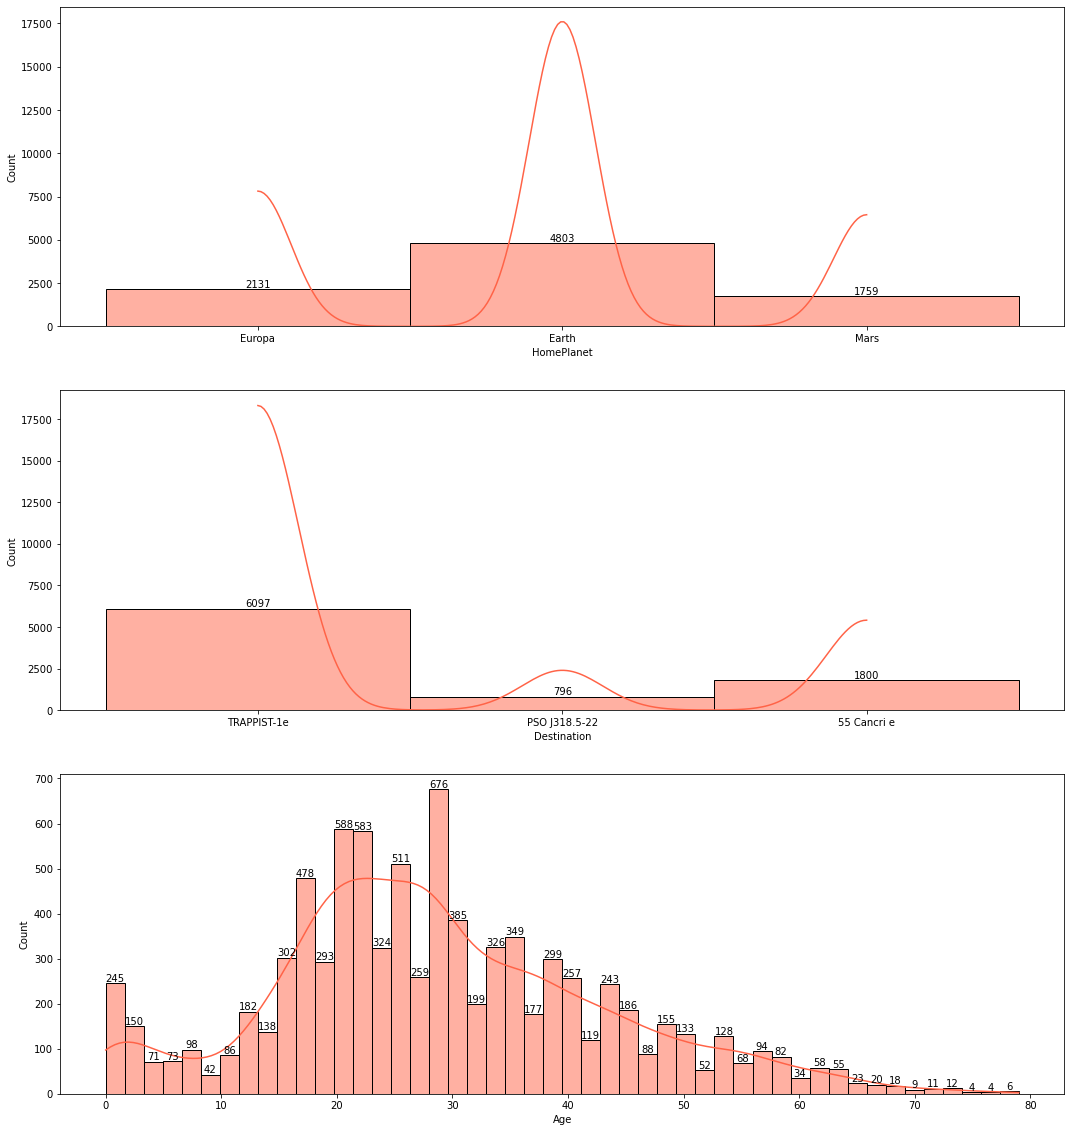

In [325]:
plot = 1

plt.figure(figsize=(18,20))
for i in columns: 
    try:
        plt.subplot(3,1,plot)
        ax = sns.histplot(data = train , x = i , kde = True, palette="bright",color="tomato" )
        plt.xlabel(i)
        plot+=1
        for i in ax.containers:     #to set a label on top of the bars.
            ax.bar_label(i,)
    except:
        train.dtypes.values== bool
    

### Finding  pattern in Tranported travelers

<h2 style="background-color:DodgerBlue;text-align: center">I. Age</h2>

In [326]:

age=train.groupby("Transported").agg({"Age":"mean"})

age

,Age
Transported,
False,29.883198
True,27.753997


there is no particular difference in age. Let's view claerly in subseqent analysis.

<h2 style="background-color:DodgerBlue;text-align: center">II. Cryosleep</h2>

[Text(0, 0, '3761'), Text(0, 0, '554')]

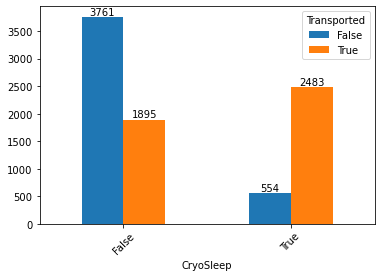

In [327]:
Cryosleep=train.groupby(["CryoSleep",'Transported']).size()
ax=Cryosleep.unstack().plot.bar()
plt.xticks(rotation=45)
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[0])

Since Cryo slept passengers confined in cabins they  were transported to alternate Dimension easily. 

<h2 style="background-color:DodgerBlue;text-align: center">III. Destination</h2>

[Text(0, 0, '702'), Text(0, 0, '395'), Text(0, 0, '3218')]

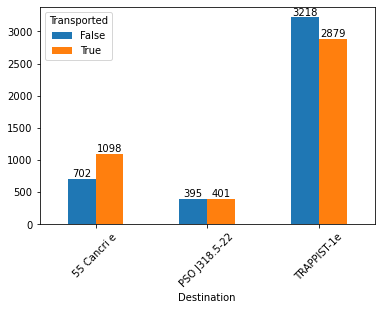

In [328]:
Cryosleep=train.groupby(["Destination",'Transported']).size()
ax=Cryosleep.unstack().plot.bar()
plt.xticks(rotation=45)
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[0])


<h2 style="background-color:DodgerBlue;text-align: center">iv. Cabin</h2>

In [329]:
#Nan Analysis
train["Cabin"]=train["Cabin"].fillna("na/0/na")

In [330]:
test["Cabin"]=test["Cabin"].fillna("na/0/na")

In [331]:
# Splitting
train[["Deck","RoomNO","Side"]]=train["Cabin"].str.split("/",2, expand=True) 
test[["Deck","RoomNO","Side"]]=test["Cabin"].str.split("/",2, expand=True) 
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,RoomNO,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


### Randomly assigning Na to Any of its side

In [332]:
train['Side'].replace('na',np.nan,regex=True,inplace=True)
test['Side'].replace('na',np.nan,regex=True,inplace=True)
train['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [333]:
train['Deck'].replace('na',np.nan,regex=True,inplace=True)
test['Deck'].replace('na',np.nan,regex=True,inplace=True)
train['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [334]:
import numpy as np
def processNan_side (x):
     return np.random.choice(["S","P"])
train['Side'] = train['Side'].apply(lambda x: processNan_side(x) if x is np.nan else x)
test['Side'] = test['Side'].apply(lambda x: processNan_side(x) if x is np.nan else x)

In [335]:

def processNan_ORD_deck (x):
     return np.random.choice(["F","G","E","D"])



def processNan_VIP_deck (x):
     return np.random.choice(["A","B","C"])
#train['Deck'] = train["Deck"].apply(lambda x: processNan_deck(x) if x is np.nan else x)
#test['Deck'] = test["Deck"].apply(lambda x: processNan_deck(x) if x is np.nan else x)

In [336]:
vips = train[train.VIP == True].copy()
non_vips = train[train.VIP == False].copy()


vips["Deck"] = vips["Deck"].apply(lambda x: processNan_VIP_deck(x) if x is np.nan else x)
non_vips["Deck"] = non_vips["Deck"].apply(lambda x: processNan_ORD_deck(x) if x is np.nan else x)
    
train = pd.concat([vips, non_vips]).sort_index()
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,RoomNO,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [337]:
vips = test[test.VIP == True].copy()
non_vips = test[test.VIP == False].copy()


vips["Deck"] = vips["Deck"].apply(lambda x: processNan_VIP_deck(x) if x is np.nan else x)
non_vips["Deck"] = non_vips["Deck"].apply(lambda x: processNan_ORD_deck(x) if x is np.nan else x)
test = pd.concat([vips, non_vips]).sort_index()


if train.Deck[train.VIP == False]:
    train['Deck'] = train["Deck"].apply(lambda x: processNan_OrD_deck(x) if x is np.nan else x)
else:
    train['Deck'] = train["Deck"].apply(lambda x: processNan_VIP_deck(x) if x is np.nan else x)

In [338]:
train['Deck'].value_counts()

F    2842
G    2597
E     931
B     783
C     749
D     530
A     256
T       5
Name: Deck, dtype: int64

c=["Deck","RoomNO","Side"]
for i in c:
    print(i,":\n",train[i].value_counts())
    print("-"*20)

c=["Deck","Side"]
for i in c:
    x =train.groupby(["Transported"])[i]


 

    for name, group in x:
        print(name)
        print(group.value_counts())
        print()
        

In [339]:
def bar_chart(col):
    Transported = train[train['Transported']==True][col].value_counts().sort_values()
    Retained = train[train['Transported']==False][col].value_counts().sort_values()
    df = pd.DataFrame([Transported,Retained])
    df.index = ['Transported','Retained']
    df.plot(kind='bar',stacked=False, figsize=(10,5),edgecolor="black",cmap='vlag_r')
    plt.xlabel(i)

Deck
Transported  Deck
False        F       1588
             G       1250
             E        594
             D        299
             C        241
             B        210
             A        129
             T          4
True         G       1347
             F       1254
             B        573
             C        508
             E        337
             D        231
             A        127
             T          1
Name: Deck, dtype: int64

Side
Transported  Side
False        P       2370
             S       1945
True         S       2420
             P       1958
Name: Side, dtype: int64



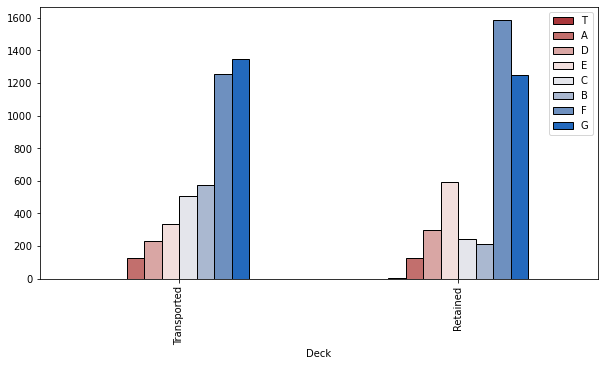

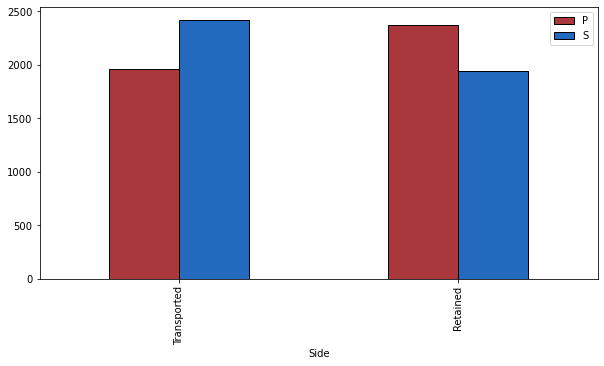

In [340]:
c=["Deck","Side"]
for i in c:
    bar_chart(i)
    x =train.groupby(["Transported"])[i]
    #for name, group in x:
    print(i)
    print(x.value_counts())
    print()
    

* B&C Deck is riskier to travel since they got transported to alternate dimension  compared to others.
* E&F Deck Passenger Retained in the ship to a significant amount.
* Starboard side passengers more transported to the alternate dimension.
* It seems no one tranported from G Deck. 

In [341]:
tab=train.groupby(["Side","Deck",'Transported']).size()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '(P, A)'),
  Text(1, 0, '(P, B)'),
  Text(2, 0, '(P, C)'),
  Text(3, 0, '(P, D)'),
  Text(4, 0, '(P, E)'),
  Text(5, 0, '(P, F)'),
  Text(6, 0, '(P, G)'),
  Text(7, 0, '(P, T)'),
  Text(8, 0, '(S, A)'),
  Text(9, 0, '(S, B)'),
  Text(10, 0, '(S, C)'),
  Text(11, 0, '(S, D)'),
  Text(12, 0, '(S, E)'),
  Text(13, 0, '(S, F)'),
  Text(14, 0, '(S, G)'),
  Text(15, 0, '(S, T)')])

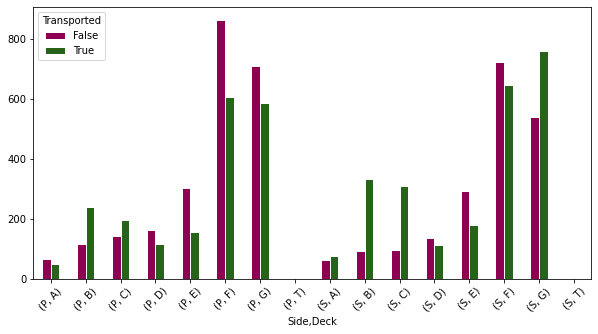

In [342]:
ax=tab.unstack().plot.bar(cmap="PiYG",figsize=(10,5),edgecolor="White")
plt.xticks(rotation=45)
#plt.bar_label(ax.containers[1])
#plt.bar_label(ax.containers[0])


<h2 style="background-color:DodgerBlue;text-align: center">v. HomePlanet</h2>

[Text(0, 0, '2749'), Text(0, 0, '727'), Text(0, 0, '839')]

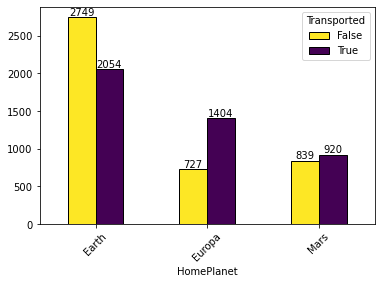

In [343]:
HomePlanet=train.groupby(["HomePlanet",'Transported']).size()
ax=HomePlanet.unstack().plot.bar(cmap="viridis_r",edgecolor="Black")
plt.xticks(rotation=45)
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[0])

* Europa People tranported to alternative dimension are relatively high.


<h2 style="background-color:DodgerBlue;text-align: center">VI. VIP Status</h2>

In [344]:
train['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [345]:
train["Transported"]=train["Transported"].map({True:"Tranported",False:"Retained"})


(array([], dtype=float64), [])

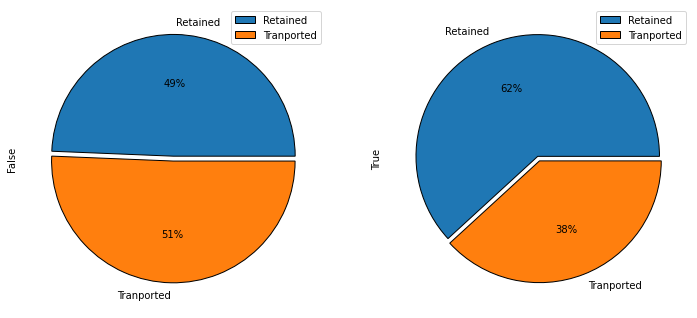

In [346]:

VIP=train.groupby(['Transported',"VIP"]).size()
ax=VIP.unstack().plot.pie(subplots=True,figsize=(12,10),autopct='%1.0f%%',explode = (0.02,0.02),wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased': True})
                                                                                         
                    
plt.xticks(rotation=45)
#plt.bar_label(ax.containers[1])
#plt.bar_label(ax.containers[0])

It Seems there is the very limited. VIP seats security is moderately good because less percentage of VIPs were transported to alternate dimension.


<h2 style="background-color:DodgerBlue;text-align: center">lets see where these VIPs stayed</h2>

Text(0.5, 1.0, 'VIP Decks')

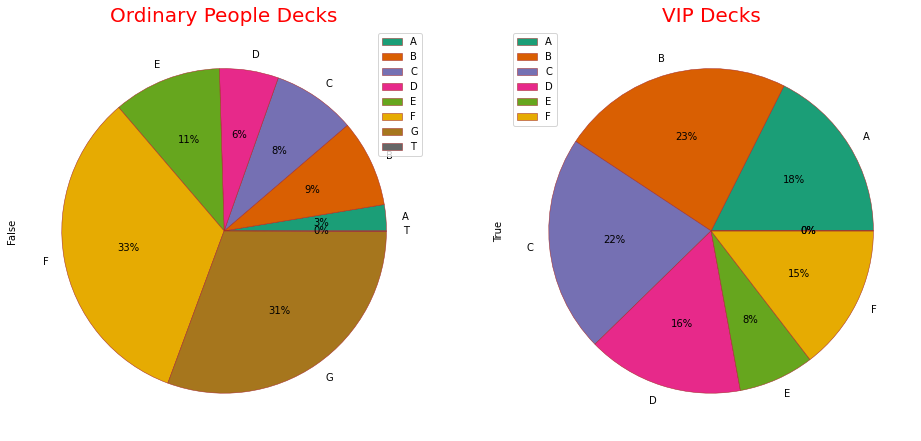

In [347]:
VIP_deck=train.groupby(['Deck',"VIP"]).size()
ax=VIP_deck.unstack().plot.pie(subplots=True,cmap="Dark2",figsize=(16,10),autopct='%1.0f%%',wedgeprops= {"edgecolor":"brown",'linewidth': 0.5})
#plt.xticks(rotation=45)
ax[0].set_title('Ordinary People Decks',color="red",size=20)
ax[1].set_title('VIP Decks',color="red",size=20)


VIPs were mostly present in ABC decks. Lets take it as decks were placed alphabeticllay from upper to lower. VIPs were mostly stayed in upper Decks.

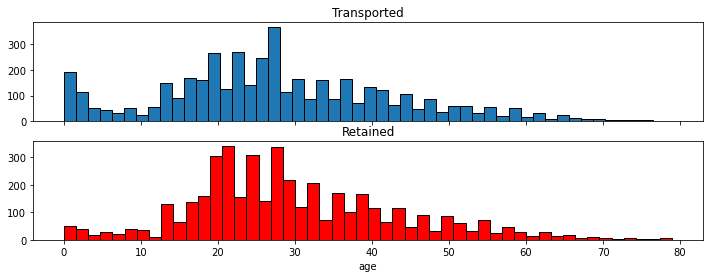

In [348]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(train.Age[train.Transported == "Tranported"], bins = bins,edgecolor="black")
ax1.set_title('Transported')

ax2.hist(train.Age[train.Transported == "Retained"], bins = bins,color="red",edgecolor="black")
ax2.set_title('Retained')

plt.xlabel('age')

plt.show()

<h3 style="background-color:DodgerBlue;text-align: center">VII Luxury Services</h3>

<p5>
    <style>
p { color:#F9051F }

    **Luxury Services**
    </style><p5>

In [349]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category


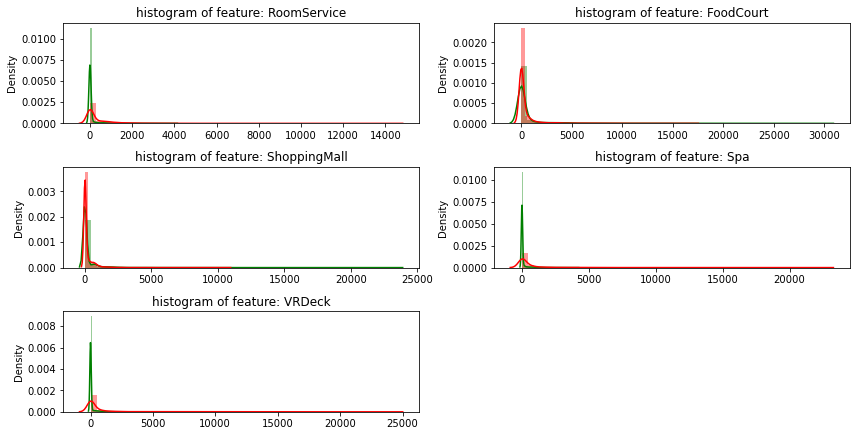

In [350]:
plt.figure(figsize=(12,28*2))
gs = gridspec.GridSpec(28, 2)
c=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
#v_features = df.ix[:,1:29].columns
for i, cn in enumerate(train[c]):
    ax = plt.subplot(gs[i])
    sns.distplot(train[cn][train.Transported == "Tranported"], bins=50,color="green")
    sns.distplot(train[cn][train.Transported == "Retained"], bins=50,color="red")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.tight_layout() 
plt.show()

Above are columns mostly contains 0 values.


<h3 style="background-color:DodgerBlue;text-align: center">VIPs and Luxury</h3>    

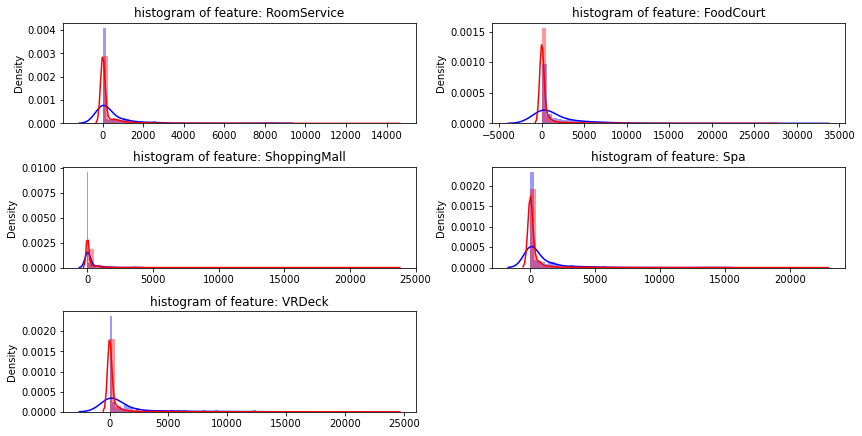

In [351]:
plt.figure(figsize=(12,28*2))
gs = gridspec.GridSpec(28, 2)
c=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
#v_features = df.ix[:,1:29].columns
for i, cn in enumerate(train[c]):
    ax = plt.subplot(gs[i])
    sns.distplot(train[cn][train.VIP == True], bins=50,color="blue")
    sns.distplot(train[cn][train.VIP == False ], bins=50,color="red")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.tight_layout() 
plt.show()

Mostly VIP persons used these luxuries. so when filling nan we can chose to replace VIPs mean value and Non-VIps withzero

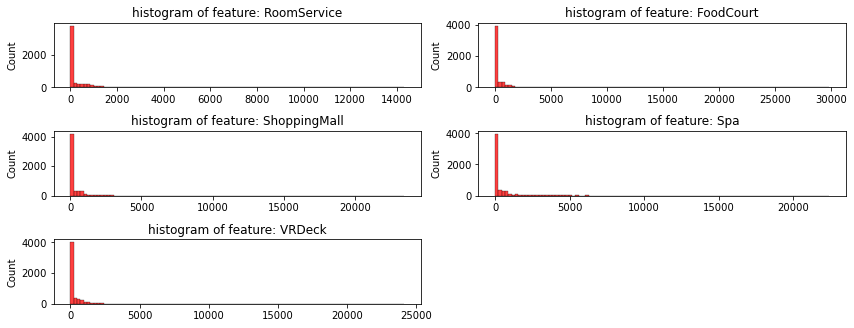

In [352]:
plt.figure(figsize=(12,12*4))
gs = gridspec.GridSpec(32, 2)
c=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
#v_features = df.ix[:,1:29].columns
for i, cn in enumerate(train[c]):
    ax = plt.subplot(gs[i])
    
    sns.histplot(train[cn][train.CryoSleep == False ],bins=100,color="red")
    sns.histplot(train[cn][train.CryoSleep == True], bins=150,color="blue")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.tight_layout() 
plt.show()

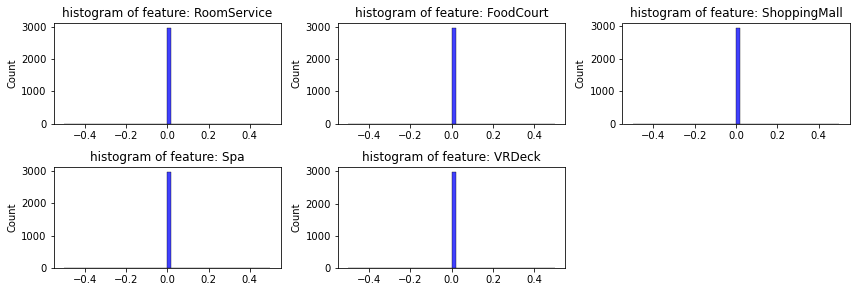

In [353]:
plt.figure(figsize=(12,28*2))
gs = gridspec.GridSpec(28, 3)
c=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
#v_features = df.ix[:,1:29].columns
for i, cn in enumerate(train[c]):
    ax = plt.subplot(gs[i])
    sns.histplot(train[cn][train.CryoSleep == True], bins=50,color="blue")
    #sns.histplot(train[cn][train.CryoSleep == False ],bins=50,color="red")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.tight_layout() 
plt.show()

People in cryosleet they can't have any use of RoomService","FoodCourt","ShoppingMall","Spa","VRDeck". so we can fill Nan values related to zero.

In [354]:
for i, cn in enumerate(train[c]):
    train[cn]=train[cn].fillna("-")

In [355]:
for i, cn in enumerate(train[c]):
   
    if [(train[cn] =="-") & (train.CryoSleep == True )]:
        train[cn]=train[cn].replace(to_replace="-",value=0)
    elif [(train[cn] =="-") & (train.CryoSleep == False ) & (train.VIP == False )]:
        train[cn]=train[cn].replace(to_replace="-",value=0)
    else:
        train[cn]=train[cn].replace(to_replace="-",value=train[cn].mean())
        
        

In [356]:
vips = train[train.VIP == True].copy()
non_vips = train[train.VIP == False].copy()

fields_mean_or_zero = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    
for field in fields_mean_or_zero:
    vips[field] = vips[field].fillna(vips[field].mean())
    non_vips[field] = non_vips[field].fillna(0)
    
train = pd.concat([vips, non_vips]).sort_index()
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,RoomNO,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,Retained,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,Tranported,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,Retained,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,Retained,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,Tranported,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,Retained,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,Retained,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,Tranported,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,Retained,E,608,S


In [357]:
vips["Spa"].value_counts()

0.0       78
1.0        5
201.0      2
207.0      2
136.0      2
          ..
548.0      1
2205.0     1
210.0      1
58.0       1
1643.0     1
Name: Spa, Length: 111, dtype: int64

In [358]:
vips_test = test[test.VIP == True].copy()
non_vips_test= test[test.VIP == False].copy()

fields_mean_or_zero = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    
for field in fields_mean_or_zero:
    vips_test[field] = vips_test[field].fillna(vips_test[field].mean())
    non_vips_test[field] = non_vips_test[field].fillna(0)
    
test = pd.concat([vips_test, non_vips_test]).sort_index()


# Let's see any NAN values still lurking

In [359]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Deck            0
RoomNO          0
Side            0
dtype: int64

In [360]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
RoomNO          0
Side            0
dtype: int64

#### All set To PreProcessing


<h1 style="background-color:Yellow;text-align: center">4. Preprocessing</h1>    

Object columns Value counts

In [361]:
train.HomePlanet.value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [362]:
train["HomePlanet"]=train["HomePlanet"].map({"Earth":1,"Europa":2,"Mars":3})
test["HomePlanet"]=test["HomePlanet"].map({"Earth":1,"Europa":2,"Mars":3})

In [363]:
train.CryoSleep.value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [364]:
train["CryoSleep"]=train["CryoSleep"].map({False:0,True:1})
test["CryoSleep"]=test["CryoSleep"].map({False:0,True:1})

In [365]:
train.Destination.value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [366]:
train["Destination"]=train["Destination"].map({"TRAPPIST-1e":1,"55 Cancri e":2,"PSO J318.5-22":3})
test["Destination"]=test["Destination"].map({"TRAPPIST-1e":1,"55 Cancri e":2,"PSO J318.5-22":3})

In [367]:
train.Destination.value_counts()

1    6097
2    1800
3     796
Name: Destination, dtype: int64

In [368]:
train.VIP.value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [369]:
train["VIP"]=train["VIP"].map({False:0,True:1})
test["VIP"]=test["VIP"].map({False:0,True:1})

In [370]:
train.Deck.value_counts()

F    2842
G    2597
E     931
B     783
C     749
D     530
A     256
T       5
Name: Deck, dtype: int64

In [371]:
train["Deck"]=train["Deck"].map({"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":8})
test["Deck"]=test["Deck"].map({"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"T":8})


In [372]:
train.Side.value_counts()

S    4365
P    4328
Name: Side, dtype: int64

In [373]:
train["Side"]=train["Side"].map({"S":1,"P":2})
test["Side"]=test["Side"].map({"S":1,"P":2})

train['Side'].replace('na',np.nan,regex=True,inplace=True)
train['Side'].value_counts()

import numpy as np
def processNan (x):
     return np.random.choice(["S","P"])
train['Side'] = train['Side'].apply(lambda x: processNan(x) if x is np.nan else x)

In [374]:
train['Transported'].value_counts()

Tranported    4378
Retained      4315
Name: Transported, dtype: int64

In [375]:
train["Transported"]=train["Transported"].map({"Retained":0,"Tranported":1})
#test["Transported"]=test["Tranported"].map({False:0,True:1})

In [376]:
train.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep         int64
Cabin            object
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
Deck              int64
RoomNO           object
Side              int64
dtype: object

Let's drop some unwanted columns..before that take a copy of the DataFrame

In [377]:
i=np.arange(0,(len(train["PassengerId"])))
train.set_index(i,inplace=True)

In [378]:
train_copy=train.copy()

In [379]:
train.drop(['PassengerId', 'Cabin',"Name","RoomNO"], axis=1, inplace=True)
train.iloc[6359]

HomePlanet        1.0
CryoSleep         0.0
Destination       1.0
Age              29.0
VIP               0.0
RoomService      68.0
FoodCourt        74.0
ShoppingMall    713.0
Spa              37.0
VRDeck           15.0
Transported       1.0
Deck              7.0
Side              2.0
Name: 6359, dtype: float64

In [380]:
test_copy=test.copy()

In [381]:
test.drop(['PassengerId', 'Cabin',"Name","RoomNO"], axis=1, inplace=True)
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,7,1
1,1,0,1,24.0,0,0.0,9.0,0.0,2823.0,0.0,6,1
2,2,1,2,58.0,0,0.0,0.0,0.0,0.0,0.0,3,1
3,2,0,1,33.0,0,0.0,6652.0,0.0,181.0,585.0,3,1
4,1,0,1,16.0,0,10.0,0.0,635.0,0.0,0.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1,1,42.0,0,0.0,0.0,0.0,0.0,0.0,7,1
4273,1,0,1,28.0,0,0.0,847.0,17.0,10.0,144.0,6,1
4274,3,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0,4,2
4275,2,0,1,55.0,0,0.0,2680.0,0.0,0.0,523.0,4,2


In [382]:
train.corr()["Transported"].sort_values()

RoomService    -0.241124
Spa            -0.218545
VRDeck         -0.204874
Deck           -0.111678
Side           -0.102009
Age            -0.074245
VIP            -0.037261
ShoppingMall    0.009391
FoodCourt       0.045583
Destination     0.067972
HomePlanet      0.115461
CryoSleep       0.460132
Transported     1.000000
Name: Transported, dtype: float64

<AxesSubplot:>

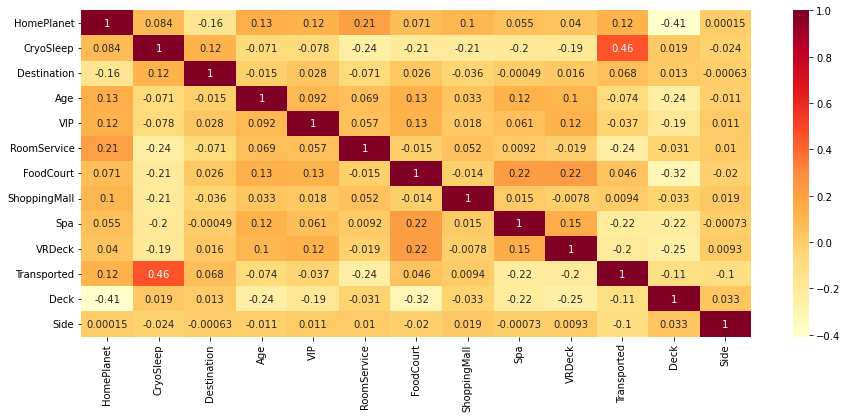

In [383]:
corr=train.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='YlOrRd')

sns.pairplot(
             train,hue="Transported",     
             diag_kind='hist',
             corner=False,
             palette='cividis',
            )

<h1 style="background-color:Yellow;text-align: center">5. Model</h1>    

### Values and Target

In [384]:
y=train["Transported"]
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [385]:
x=train.drop("Transported",axis=1)

In [386]:
x_svm=train[["CryoSleep","VIP"]]

In [387]:
from sklearn.decomposition import PCA

In [388]:
# Create principal components
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(x)
#convert X_pca to DF
X_pca = pd.DataFrame(X_pca)
X_pca2=X_pca.copy()

X_pca

,0,1
0,-577.772427,-216.153457
1,-407.108227,148.506641
2,4567.219184,2540.153650
3,1568.926708,1461.681922
4,-360.495698,107.029659
...,...,...
8688,6160.933870,-1841.453036
8689,-577.802055,-216.174619
8690,-585.973175,-199.131996
8691,1397.921071,1796.253520


sns.pairplot(
             X_pca,    
             diag_kind='hist',
             corner=False,
             palette='cividis',
            )

In [389]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [390]:
xtrain.shape

(6954, 12)

In [391]:

xtest.shape

(1739, 12)

In [392]:
ytrain.shape

(6954,)

In [393]:
ytest.shape

(1739,)

In [394]:
# Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [395]:

algorithm = [('KNN Classifier', KNeighborsClassifier()), 
              ('Random Forest Classifier', RandomForestClassifier()),
              ('Bagging Classifier', BaggingClassifier()),
              ('Adaboost Classifier', AdaBoostClassifier()), 
              ('Gradientboot Classifier',GradientBoostingClassifier()),
              ('Decision Tree Classifier', DecisionTreeClassifier())
             ]

trained_models=[]
model_score={}

for index,ml in enumerate(algorithm):
    model=ml[1]
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    model_score[ml[0]] = str(model.score(xtrain,ytrain)*100)+'%'
    trained_models.append((ml[0],model))

## Accuracy Score

In [396]:
for key in model_score:
    print(key,'=',model_score[key])

KNN Classifier = 82.72936439459303%
Random Forest Classifier = 94.99568593615186%
Bagging Classifier = 93.50014380212826%
Adaboost Classifier = 79.23497267759562%
Gradientboot Classifier = 81.53580672993961%
Decision Tree Classifier = 94.99568593615186%


In [397]:
# Metric Evaluation Libriaries
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc,RocCurveDisplay

In [398]:
def conf_matrix(algo,model):
    print(algo)
    plt.figure(figsize=(8,5))
    pred=model.predict(xtest)
    cm=confusion_matrix(ytest,pred)
    print(ytest.shape,pred.shape)
    sns.heatmap(cm,annot=True,cmap='YlOrRd',cbar=False)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Label')
    plt.show()

KNN Classifier
(1739,) (1739,)


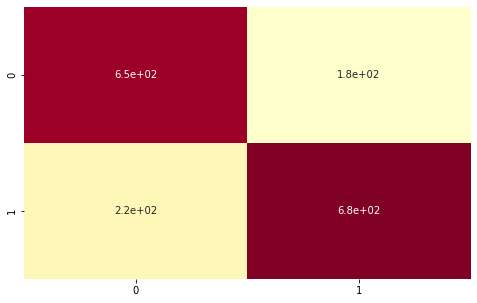

Random Forest Classifier
(1739,) (1739,)


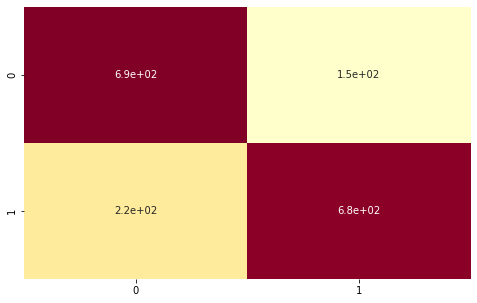

Bagging Classifier
(1739,) (1739,)


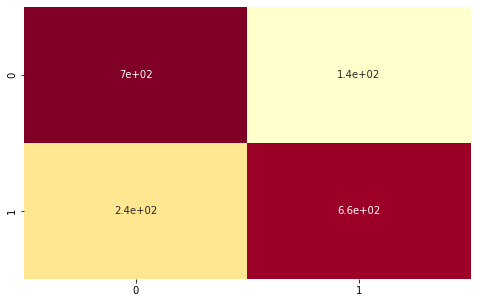

Adaboost Classifier
(1739,) (1739,)


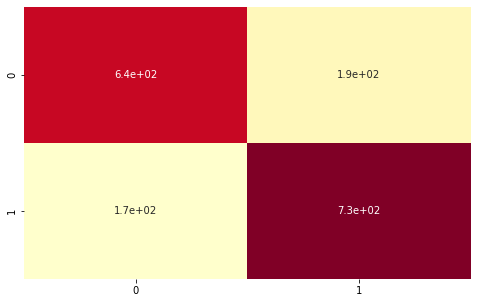

Gradientboot Classifier
(1739,) (1739,)


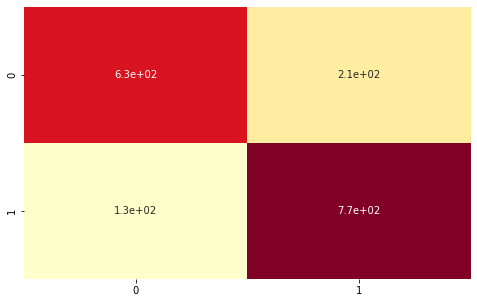

Decision Tree Classifier
(1739,) (1739,)


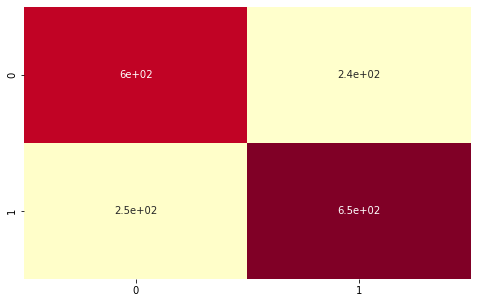

<Figure size 432x288 with 0 Axes>

In [399]:
#plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(28, 4)
for index,ml in enumerate(trained_models):
    conf_matrix(ml[0],ml[1])
    
plt.tight_layout() 
plt.show()


In [400]:
def p_roc_curve(algo,model):
    print(algo)
    y_pred_proba=model.predict_proba(xtest)[::,1]
    fpr,tpr,thresholds=roc_curve(ytest,y_pred_proba)
    roc_auc=auc(fpr,tpr)
    curve=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
    curve.plot()
    plt.show()

KNN Classifier


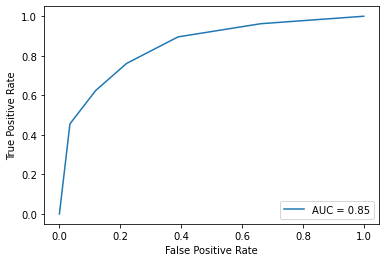

Random Forest Classifier


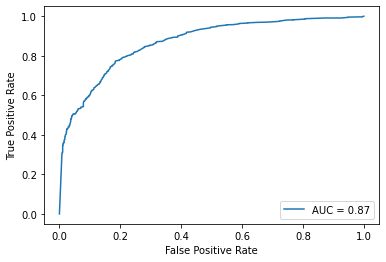

Bagging Classifier


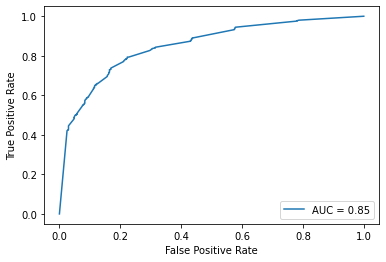

Adaboost Classifier


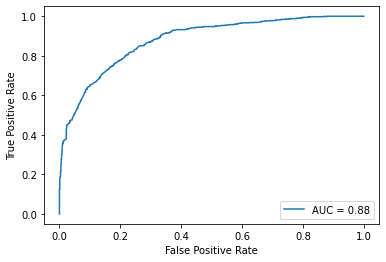

Gradientboot Classifier


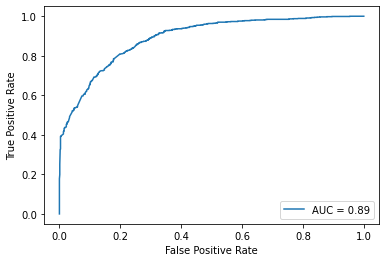

Decision Tree Classifier


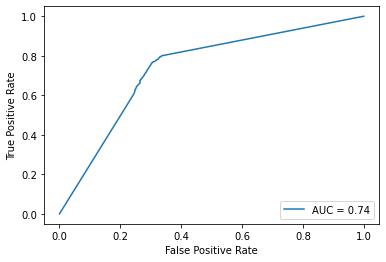

In [401]:
for index,ml in enumerate(trained_models):
    p_roc_curve(ml[0],ml[1])
    


In [402]:
for index,ml in enumerate(algorithm):
    model=ml[1]
    
    y_pred=model.predict(test)
    test_copy[str(ml[1])+"Prediction"]=y_pred
test_copy

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Deck,RoomNO,Side,KNeighborsClassifier()Prediction,RandomForestClassifier()Prediction,BaggingClassifier()Prediction,AdaBoostClassifier()Prediction,GradientBoostingClassifier()Prediction,DecisionTreeClassifier()Prediction
0,0013_01,1,1,G/3/S,1,39.0,0,0.0,0.0,0.0,...,Nelly Carsoning,7,3,1,1,1,1,1,1,1
1,0018_01,1,0,F/4/S,1,24.0,0,0.0,9.0,0.0,...,Lerome Peckers,6,4,1,0,0,0,0,0,0
2,0019_01,2,1,C/0/S,2,58.0,0,0.0,0.0,0.0,...,Sabih Unhearfus,3,0,1,1,1,1,1,1,1
3,0021_01,2,0,C/1/S,1,33.0,0,0.0,6652.0,0.0,...,Meratz Caltilter,3,1,1,1,1,1,1,1,1
4,0023_01,1,0,F/5/S,1,16.0,0,10.0,0.0,635.0,...,Brence Harperez,6,5,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,42.0,0,0.0,0.0,0.0,...,Jeron Peter,7,1496,1,1,1,1,1,1,1
4273,9269_01,1,0,na/0/na,1,28.0,0,0.0,847.0,17.0,...,Matty Scheron,6,0,1,0,1,0,0,0,0
4274,9271_01,3,1,D/296/P,2,43.0,0,0.0,0.0,0.0,...,Jayrin Pore,4,296,2,1,1,1,1,1,1
4275,9273_01,2,0,D/297/P,1,55.0,0,0.0,2680.0,0.0,...,Kitakan Conale,4,297,2,1,1,1,1,1,1


In [403]:
test_copy.to_csv("prediction.csv",index=False)


In [404]:
test_submission = test_copy[['PassengerId',"DecisionTreeClassifier()Prediction" ]].copy()
test_submission.rename(columns = {'DecisionTreeClassifier()Prediction':'Transported'}, inplace = True)
test_submission["Transported"]=test_submission["Transported"].map({0:False,1:True})
test_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [405]:
test_submission.to_csv("submission.csv",index=False)

<h1 style="background-color:Yellow;text-align: center">6. Deep Learning</h1>    

## Standardization 

In [408]:
mean=x.mean(axis=0)

In [409]:
x -=mean

In [410]:
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0.350167,-0.349362,-0.390199,10.189118,-0.022892,-220.009318,-448.434027,-169.5723,-304.588865,-298.26182,-3.304843,0.502128
1,-0.649833,-0.349362,-0.390199,-4.810882,-0.022892,-111.009318,-439.434027,-144.5723,244.411135,-254.26182,0.695157,-0.497872
2,0.350167,-0.349362,-0.390199,29.189118,0.977108,-177.009318,3127.565973,-169.5723,6410.411135,-249.26182,-4.304843,-0.497872
3,0.350167,-0.349362,-0.390199,4.189118,-0.022892,-220.009318,834.565973,201.4277,3024.411135,-105.26182,-4.304843,-0.497872
4,-0.649833,-0.349362,-0.390199,-12.810882,-0.022892,82.990682,-378.434027,-18.5723,260.411135,-296.26182,0.695157,-0.497872
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.350167,-0.349362,0.609801,12.189118,0.977108,-220.009318,6370.565973,-169.5723,1338.411135,-224.26182,-4.304843,0.502128
8689,-0.649833,0.650638,1.609801,-10.810882,-0.022892,-220.009318,-448.434027,-169.5723,-304.588865,-298.26182,1.695157,-0.497872
8690,-0.649833,-0.349362,-0.390199,-2.810882,-0.022892,-220.009318,-448.434027,1702.4277,-303.588865,-298.26182,1.695157,-0.497872
8691,0.350167,-0.349362,0.609801,3.189118,-0.022892,-220.009318,600.565973,-169.5723,48.411135,2936.73818,-0.304843,-0.497872


In [411]:
std=x.std(axis=0)

In [412]:
x /=std
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,0.440360,-0.732728,-0.601283,0.710561,-0.153054,-0.333085,-0.281011,-0.283562,-0.270610,-0.262988,-1.870408,1.004208
1,-0.817212,-0.732728,-0.601283,-0.335498,-0.153054,-0.168064,-0.275371,-0.241757,0.217146,-0.224192,0.393431,-0.995695
2,0.440360,-0.732728,-0.601283,2.035569,6.532879,-0.267985,1.959885,-0.283562,5.695295,-0.219783,-2.436368,-0.995695
3,0.440360,-0.732728,-0.601283,0.292138,-0.153054,-0.333085,0.522980,0.336832,2.687022,-0.092813,-2.436368,-0.995695
4,-0.817212,-0.732728,-0.601283,-0.893396,-0.153054,0.125645,-0.237145,-0.031057,0.231361,-0.261225,0.393431,-0.995695
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.440360,-0.732728,0.939682,0.850036,6.532879,-0.333085,3.992106,-0.283562,1.189104,-0.197740,-2.436368,1.004208
8689,-0.817212,1.364606,2.480648,-0.753921,-0.153054,-0.333085,-0.281011,-0.283562,-0.270610,-0.262988,0.959391,-0.995695
8690,-0.817212,-0.732728,-0.601283,-0.196023,-0.153054,-0.333085,-0.281011,2.846835,-0.269722,-0.262988,0.959391,-0.995695
8691,0.440360,-0.732728,0.939682,0.222400,-0.153054,-0.333085,0.376344,-0.283562,0.043011,2.589428,-0.172529,-0.995695


In [413]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [414]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [415]:
model=Sequential()
model.add(Dense(8,input_dim=len(x.columns),activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [416]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [417]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [418]:
model.fit(x=x,y=y,epochs=124,verbose=1)

Epoch 1/124
272/272 [==============================] - 2s 3ms/step - loss: 0.6626 - accuracy: 0.6238
Epoch 2/124
272/272 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.7354
Epoch 3/124
272/272 [==============================] - 1s 3ms/step - loss: 0.5316 - accuracy: 0.7729
Epoch 4/124
272/272 [==============================] - 1s 3ms/step - loss: 0.5073 - accuracy: 0.7835
Epoch 5/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4938 - accuracy: 0.7883
Epoch 6/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4839 - accuracy: 0.7920
Epoch 7/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4770 - accuracy: 0.7927
Epoch 8/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.7933
Epoch 9/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4672 - accuracy: 0.7929
Epoch 10/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4631 - accura

272/272 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.8001
Epoch 82/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4239 - accuracy: 0.7985
Epoch 83/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.7975
Epoch 84/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.7988
Epoch 85/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.7993
Epoch 86/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.7983
Epoch 87/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8004
Epoch 88/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4234 - accuracy: 0.7974
Epoch 89/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4235 - accuracy: 0.7997
Epoch 90/124
272/272 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 

## Prediction 

In [274]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,7,1
1,1,0,1,24.0,0,0.0,9.0,0.0,2823.0,0.0,6,1
2,2,1,2,58.0,0,0.0,0.0,0.0,0.0,0.0,3,1
3,2,0,1,33.0,0,0.0,6652.0,0.0,181.0,585.0,3,1
4,1,0,1,16.0,0,10.0,0.0,635.0,0.0,0.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1,1,42.0,0,0.0,0.0,0.0,0.0,0.0,7,1
4273,1,0,1,28.0,0,0.0,847.0,17.0,10.0,144.0,7,1
4274,3,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0,4,2
4275,2,0,1,55.0,0,0.0,2680.0,0.0,0.0,523.0,4,2


In [283]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,2,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,2,2
1,1,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,6,1
2,2,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,1
3,2,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,1
4,1,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,2
8689,1,1,3,18.0,0,0.0,0.0,0.0,0.0,0.0,0,7,1
8690,1,0,1,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,7,1
8691,2,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,5,1


In [419]:
prediction=model.predict(x)

272/272 [==============================] - 1s 2ms/step


In [421]:
print(prediction)

[[0.4991833 ]
 [0.18436785]
 [0.00397053]
 ...
 [0.8469505 ]
 [0.06635467]
 [0.9715369 ]]


In [422]:
print(y)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


# Accuracy

In [424]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [426]:
accuracy=accuracy_score(y,prediction.round())
accuracy

0.8016795122512367

In [429]:
precision=precision_score(y,prediction.round())
precision

0.7846417846417847

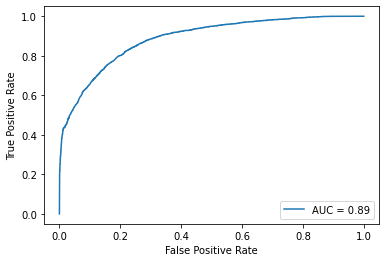

In [431]:

fpr,tpr,thresholds=roc_curve(y,prediction)
roc_auc=auc(fpr,tpr)
curve=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
curve.plot()
plt.show()

## Test Prediction 

In [ ]:
#let's predict our test 

In [432]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,7,1
1,1,0,1,24.0,0,0.0,9.0,0.0,2823.0,0.0,6,1
2,2,1,2,58.0,0,0.0,0.0,0.0,0.0,0.0,3,1
3,2,0,1,33.0,0,0.0,6652.0,0.0,181.0,585.0,3,1
4,1,0,1,16.0,0,10.0,0.0,635.0,0.0,0.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1,1,42.0,0,0.0,0.0,0.0,0.0,0.0,7,1
4273,1,0,1,28.0,0,0.0,847.0,17.0,10.0,144.0,6,1
4274,3,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0,4,2
4275,2,0,1,55.0,0,0.0,2680.0,0.0,0.0,523.0,4,2


In [433]:
DL_prediction=model.predict(test)

134/134 [==============================] - 0s 2ms/step


In [437]:
test_copy["DL_prediction"]=DL_prediction.round()

In [438]:
test_copy

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck,RoomNO,Side,KNeighborsClassifier()Prediction,RandomForestClassifier()Prediction,BaggingClassifier()Prediction,AdaBoostClassifier()Prediction,GradientBoostingClassifier()Prediction,DecisionTreeClassifier()Prediction,DL_prediction
0,0013_01,1,1,G/3/S,1,39.0,0,0.0,0.0,0.0,...,7,3,1,1,1,1,1,1,1,1.0
1,0018_01,1,0,F/4/S,1,24.0,0,0.0,9.0,0.0,...,6,4,1,0,0,0,0,0,0,0.0
2,0019_01,2,1,C/0/S,2,58.0,0,0.0,0.0,0.0,...,3,0,1,1,1,1,1,1,1,1.0
3,0021_01,2,0,C/1/S,1,33.0,0,0.0,6652.0,0.0,...,3,1,1,1,1,1,1,1,1,1.0
4,0023_01,1,0,F/5/S,1,16.0,0,10.0,0.0,635.0,...,6,5,1,0,0,0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,G/1496/S,1,42.0,0,0.0,0.0,0.0,...,7,1496,1,1,1,1,1,1,1,1.0
4273,9269_01,1,0,na/0/na,1,28.0,0,0.0,847.0,17.0,...,6,0,1,0,1,0,0,0,0,1.0
4274,9271_01,3,1,D/296/P,2,43.0,0,0.0,0.0,0.0,...,4,296,2,1,1,1,1,1,1,1.0
4275,9273_01,2,0,D/297/P,1,55.0,0,0.0,2680.0,0.0,...,4,297,2,1,1,1,1,1,1,1.0


In [440]:
test_submission = test_copy[['PassengerId',"DL_prediction" ]].copy()
test_submission.rename(columns = {'DL_prediction':'Transported'}, inplace = True)
test_submission["Transported"]=test_submission["Transported"].map({0:False,1:True})
test_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [441]:
test_submission.to_csv("submission.csv",index=False)